In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
f = open('coords/coords_step0000000.dat')
line = f.readline()
N = int(line.split("\n")[0])

In [41]:
steps, kinetic_energy, potential_energy = np.loadtxt("state_variables.txt").transpose()

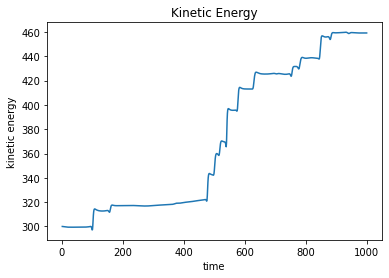

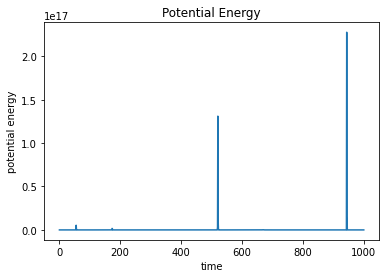

In [43]:
plt.title('Kinetic Energy')
plt.xlabel('time')
plt.ylabel('kinetic energy')
plt.plot(steps, kinetic_energy)
plt.show()

plt.title('Potential Energy')
plt.xlabel('time')
plt.ylabel('potential energy')
plt.plot(steps, potential_energy)
plt.show()